<a href="https://colab.research.google.com/github/fboldt/aulasml/blob/code/01_01_regress%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import make_regression
import matplotlib.pylab as plt

X, y, coef = make_regression(n_features=1, noise=30, coef=True, random_state=4)
X.shape, y.shape, coef

((100, 1), (100,), array(75.95295292))

In [2]:
y = y.reshape(-1,1)
X.shape, y.shape

((100, 1), (100, 1))

In [3]:
def modelo_linear(X, coef):
  y = X*coef
  return y
ypred = modelo_linear(X, coef)
ypred.shape

(100, 1)

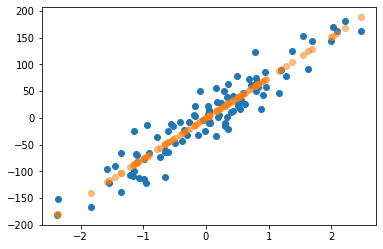

In [4]:
def plot_prediction(X, y, ypred):
  plt.scatter(X, y)
  plt.scatter(X, ypred, alpha=0.5)
  plt.show()

plot_prediction(X, y, ypred)

In [5]:
import numpy as np

def mae(y, ypred):
    ydif = ypred - y
    yabs = abs(ydif)
    esum = np.sum(yabs)
    mae = esum/len(yabs)
    return mae
ypred = modelo_linear(X, coef)
mae(y, ypred)

20.636951137353734

In [6]:
def mse(y, ypred):
    ydif = ypred - y
    ysqr = ydif**2
    esum = np.sum(ysqr)
    mse = esum/len(ysqr)
    return mse
ypred = modelo_linear(X, coef)
mse(y, ypred)

655.5657700738702

In [7]:
from math import sqrt

def rmse(y, ypred):
  return sqrt(mse(y,ypred))
ypred = modelo_linear(X, coef)
rmse(y, ypred)

25.60401863133735

In [8]:
from sklearn.metrics import mean_squared_error
from math import sqrt

def rmse(y, ypred):
  return sqrt(mean_squared_error(y,ypred))
ypred = modelo_linear(X, coef)
rmse(y, ypred)

25.60401863133735

In [9]:
import numpy as np

class RegressãoLinear():
  def __init__(self, coef):
    self.coef_ = coef
  
  def predict(self, X):
    y = X*self.coef_
    return y.reshape(-1,)

modelo = RegressãoLinear(coef)
ypred = modelo.predict(X)
rmse(y, ypred)

25.60401863133735

In [10]:
import numpy as np

class RegressãoLinear():
  def __init__(self):
    self.coef_ = np.random.uniform(-100,200,(1,))
  
  def predict(self, X):
    y = X*self.coef_
    return y

modelo = RegressãoLinear()
ypred = modelo.predict(X)
rmse(y, ypred)

54.44044958029636

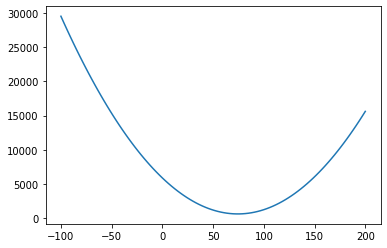

In [11]:
coefs = np.linspace(-100, 200, 100)
mses = []
for coef in coefs:
  modelo.coef_ = coef
  ypred = modelo.predict(X)
  mse = mean_squared_error(y, ypred)
  mses.append(mse)
plt.plot(coefs, mses)
plt.show()

In [12]:
modelo.coef_ = 74.39967
ypred = modelo.predict(X)
erro = ypred - y
deriv = np.mean(X * erro)
deriv

2.8066097774726018e-06

In [13]:
import numpy as np
import random

class RegressãoLinear():
  def __init__(self):
    self.coef_ = np.random.uniform(-100,200,(1,)) # 0 # 76 # 57 # 56 # 
  
  def fit(self, X, y):
    for _ in range(10):
      ypred = self.predict(X)
      erro = ypred - y
      deriv = np.mean(X * erro)
      print(self.coef_, mean_squared_error(y,ypred), deriv)
      self.coef_ = self.coef_ - deriv
    return self

  def predict(self, X):
    y = X*self.coef_
    return y

modelo = RegressãoLinear()
modelo.fit(X, y)
ypred = modelo.predict(X)
rmse(y, ypred)

[-11.36715967] 7625.284509710224 -81.2902350937954
[69.92307543] 672.2728967194734 -4.242936325479406
[74.16601175] 653.3307487776774 -0.22145967029497376
[74.38747142] 653.2791445249276 -0.011559067071693772
[74.39903049] 653.2790039390281 -0.0006033244400274107
[74.39963381] 653.279003556029 -3.1490463524423974e-05
[74.3996653] 653.2790035549856 -1.6436418373189099e-06
[74.39966695] 653.2790035549826 -8.578973288209113e-08
[74.39966703] 653.2790035549826 -4.477784241174732e-09
[74.39966704] 653.2790035549828 -2.337195859070107e-10


25.5593232217714